In [2]:
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt

## 여러대가있는 주차사진으로 분석

In [3]:
# 이미지를 자른다. (1대씩 측정하기위해)
src = cv2.imread('8.jpg')
dst = src[0:642, 700:1438].copy() #높이,넓이

# cv2.imshow('source', src)
# cv2.imshow('cut image', dst)
cv2.imwrite('new_image.png',dst)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
src.shape

(642, 1438, 3)

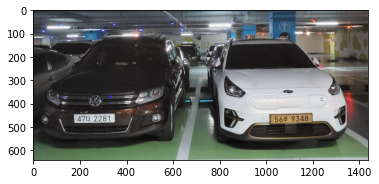

In [5]:
plt.imshow(src)

In [6]:
# 이미지를 자른다 -> 번호판만 잘라옴
src = cv2.imread('new_image.png')
dst = src[440:500, 310:500].copy() #높이,넓이

# cv2.imshow('source', src)
# cv2.imshow('cut image', dst)
cv2.imwrite('new.png',dst)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
#잘라온 번호판으로 mask처리
src = cv2.imread('new.png')
hsv= cv2.cvtColor(src,cv2.COLOR_BGR2HSV)

lower = np.array([43,43,117])
upper = np.array([211,220,254])

mask = cv2.inRange(hsv,lower,upper)
# cv2.imshow('src', src)
# cv2.imshow('hsv', hsv)
# cv2.imshow('mask',mask)

cv2.waitKey()
cv2.destroyAllWindows()

In [8]:
#전기차인지 아닌지 본격 판정
isElectronic = 0 
notElectronic = 0
height = src.shape[0]
width = src.shape[1]

for y in range(height):
    for x in range(width):
        if mask[y, x] >= 1: # 픽셀 값이 1 이상이면 전기차로 가정
            isElectronic += 1
        else:
            notElectronic += 1
                                  
print(isElectronic, notElectronic)
            
if 10 * isElectronic >= notElectronic: # 10배(하이퍼 파라미터) 이상 차이가 나면 전기자동차로 인식
    print("전기 자동차가 검출되었습니다.")

else:
    print("전기 자동차가 아닙니다.")

5668 5732
전기 자동차가 검출되었습니다.


In [16]:
# 이미지를 자른다. (1대씩 측정하기위해) ->이번엔 일반차
src = cv2.imread('8.jpg')
dst = src[0:642, 0:700].copy() #높이,넓이

# cv2.imshow('source', src)
# cv2.imshow('cut image', dst)
cv2.imwrite('new_image2.png',dst)

cv2.waitKey(0)
cv2.destroyAllWindows()

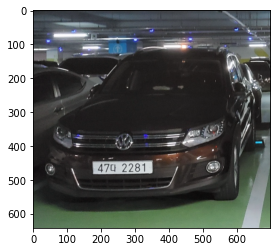

In [17]:
plt.imshow(dst)

In [20]:
# 이미지를 자른다 -> 번호판 추출
src = cv2.imread('new_image2.png')
dst = src[440:500, 310:500].copy() #높이,넓이

# cv2.imshow('source', src)
# cv2.imshow('cut image', dst)
cv2.imwrite('new2.png',dst)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [21]:
#mask처리
src = cv2.imread('new2.png')
hsv= cv2.cvtColor(src,cv2.COLOR_BGR2HSV)

lower = np.array([43,43,117])
upper = np.array([211,220,254])

mask = cv2.inRange(hsv,lower,upper)
# cv2.imshow('src', src)
# cv2.imshow('hsv', hsv)
# cv2.imshow('mask',mask)

cv2.waitKey()
cv2.destroyAllWindows()

In [22]:
#전기차 인지 아닌지 판정
isElectronic = 0 
notElectronic = 0
height = src.shape[0]
width = src.shape[1]

for y in range(height):
    for x in range(width):
        if mask[y, x] >= 1: # 픽셀 값이 1 이상이면 전기차로 가정
            isElectronic += 1
        else:
            notElectronic += 1
                                  
print(isElectronic, notElectronic)
            
if 10 * isElectronic >= notElectronic: # 10배(하이퍼 파라미터) 이상 차이가 나면 전기자동차로 인식
    print("전기 자동차가 검출되었습니다.")

else:
    print("전기 자동차가 아닙니다.")

36 11364
전기 자동차가 아닙니다.
